# INFO-F-422 -  Statistical Foundations of Machine Learning 

### Gian Marco Paldino - __[gian.marco.paldino@ulb.be](mailto:gian.marco.paldino@ulb.be)__
### Cédric Simar - __[cedric.simar@ulb.be](mailto:cedric.simar@ulb.be)__

## TP 4 - Predictions: Network-based methods

####  March 2023

#### Materials originally developed by *Gian Marco Paldino* following the [original Keras Tutorial](https://tensorflow.rstudio.com/tutorials/keras/regression)

# Preliminaries



## Supervised learning

The process of supervised learning involves the presence of an entity (the learner, also called prediction model), whose goal is to learn the mapping between inputs and outputs in a given problem.

A supervised learning problem can formulated as follows:

\begin{equation*}
 y = m(\mathbf{x})  
\end{equation*}

where:
- $y$ represents the output variable (also called target)
- $\mathbf{x}$ represents the vector of inputs (also called features).
- $m$ is the (unknown) mapping between input and outputs.

In the majority of the supervised learning problems, the mapping $m$ between input and outputs is unknown and needs to be estimated on basis of the available input/output observation pairs $(\mathbf{x}_i,y_i)$.

## Classification vs regression

Both classification and regression are sub-fields of *supervised learning*. In the two cases, we have predictive variables $\mathbf{x}$ and a target variable $y$. 
The main difference betweet the two type of problems is the type of the target variabile:

- In classification, $y$ is a discrete variable; i.e $y \in \{C_1,\cdots,C_k\}$
- In regression, $y$ is a continuous variable; i.e $y \in \mathbb{R}$

## Classification with Neural Networks

In machine learning and cognitive science, an artificial neural network (ANN) is a network 
of interconnected processing elements, called neurons, which are used to estimate or approximate functions that can depend on a large number of inputs that are generally unknown.
The concept of artificial neural networks is inspired by the structure of the central nervous systems of animals, in particular the brain. 
In such biological neural networks, a set of units (i.e. the neurons) are interconnected with each other to form a data-processing network. The processing capability of the network depends on the strength of the connections between the neurons, which can be dynamically modified across time in response to external stimuli that the network is subject to.
This dynamic adaptation of the connections gives this system the possibility to learn from the experiences it is subject to.

Both artificial and neural networks are characterized by three features : **architecture**, **activity** and **learning rules**:

- The **architecture** is a specification of which input variables are involved in the network and what are the topological relationships between the nodes of the network.
- The **activity rule** describes defines how the activities of the neurons change in response to each other (usually with a short time-scale dynamics).
- The **learning rule** specifies the way in which the neural network's weights needs to be adapted with time. This learning is usually viewed as taking place on a longer time scale than the time scale of the dynamics under the activity rule. Usually the learning rule will depend on the activities of the neurons. It may also depend on the values of the target values supplied by a teacher.


For our task, we will focus on a specific family of artificial neural networks, the multi-layer perceptron (MLP). 
The **architecture** of a multi-layer perceptron is organized in layers, with each layer being fully connected to the following. The first layer, also called input layer, is constituted by the input variables. Following it there are one or more intermediate layers, named hidden layers, yielding to an output layer with one output variable. In this type of network, information moves from the input nodes, through the hidden nodes, to the output node. Moreover, every connection between nodes has an associated weight.

In the following, we will focus on a standard one-hidden layer network:
![](ANN_FF.png)

Described by the equation :
\begin{equation}
m(\mathbf{x}) = f_o \left( b_o + \sum_{j=1}^{|H|} w_{jo} \cdot f_h \left( \sum_{k=1}^{|I|} w_{ik} x_{ik} + b_j  \right) \right)
\end{equation}


where $\mathbf{x'}$ is the input vector $\mathbf{x}$, augmented with 1, i.e., $\mathbf{x'}= (1;\mathbf{x}^T)^T$ , 
$w_{ij}$ is the weight of the connection between the $i^\text{th}$ input node and the $j^\text{th}$ hidden node, $w_{jo}$ are the weights of the connections between hidden node $j$ and the output node and $|H|$ is the number of hidden nodes. The number of hidden nodes ($|H|$) controls the complexity of the model. 


The **activation rule** of such network is divided into two steps.
Firstly, each node $j$ determines its activation $a_j$, by collecting the output of its input nodes:
\begin{equation}
a_j = \sum_{i} w_{ij} x_i 
\end{equation}
Then, the *activity* of the neuron is computed as a function of the value of the activation $a_j$. In the case of the considered network, we have two different activity functions: $f_h(\cdot)$ for the hidden layer and $f_o(\cdot)$ for the output node.
Common choices for activity functions are:

\begin{align*}
f(x) = x && \text{Linear} \\
f(x) = \frac{1}{1+e^{-x}} && \text{Logistic} \\
f(x) = \tanh(x) && \text{Hyperbolic tangent} \\
f(x) = 
\begin{cases}
1 & x > 0 \\
-1 & x \le 0 \\
\end{cases} && \text{Threshold} \\
\end{align*}


Concerning the **learning rule**, the weights are generally estimated using some specific
optimization procedure, the most popular one being the backpropagation procedure. Usually, at the beginning, the weights are chosen to be random values near zero and the backpropagation procedure updates the weights in order to minimize the prediction errors. The backpropagation procedure could be done using all the available data in a single session (batch training) or providing the network one training example at a time (online training).
The error function minimized by neural networks is nonconvex and so can have multiple local
minima. In consequence, the final solution will depend on the value chosen as starting point.
Because of this randomness, neural networks are often trained multiple times using different
random starting values, and the outputs of the different networks are averaged to obtain the final predictions.


## Regression with Neural Networks

In a *regression* problem, the aim is to predict the output of a continuous value, like a price or a probability.
Contrast this with a *classification* problem, where the aim is to select a class from a list of classes (for example, where a picture contains an apple or an orange, recognizing which fruit is in the picture).

This tutorial uses the classic [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) dataset and demonstrates how to build models to predict the fuel efficiency of the late-1970s and early 1980s automobiles.
To do this, you will provide the models with a description of many automobiles from that time period.
This description includes attributes like cylinders, displacement, horsepower, and weight.

# Data Loading and Preprocessing

In [1]:
install.packages("GGally")
install.packages("skimr")
install.packages('tensorflow')
install.packages('keras')
install.packages('tidyverse')
install.packages('tidymodels')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘plyr’, ‘reshape’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘reticulate’, ‘tfruns’, ‘tfautograph’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zeallot’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘conflicted’, ‘jsonlite’, ‘ragg’, ‘stringr’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“ins

`GGally`: This package provides extensions to the ggplot2 package for creating complex plots and visualizations. It includes functions for creating scatterplot matrices, parallel coordinate plots, and more.

`skimr`: This package provides a simple way to generate summary statistics for data frames, including mean, standard deviation, and missing values. It also provides a way to visualize the distribution of variables using histograms, density plots, and more.

`tensorflow`: This package provides an interface to the TensorFlow deep learning framework, allowing you to build and train neural networks in R. TensorFlow is a popular open-source library for building and training deep neural networks.

`keras`: This package provides a high-level interface to the Keras deep learning framework, which can run on top of various lower-level deep learning frameworks, including TensorFlow. Keras is a popular open-source library for building and training deep neural networks.

`tidyverse`: This package is a collection of several packages that work together to provide a consistent set of tools for data manipulation and visualization in R. It includes packages like dplyr for data manipulation, ggplot2 for visualization, and tidyr for data tidying.

`tidymodels`: This package provides a framework for building and evaluating machine learning models in R using a consistent syntax. It includes packages like parsnip for model specification, dials for hyperparameter tuning, and rsample for cross-validation.

`recipes`: This package is a part of the tidymodels ecosystem in R, which provides a framework for building, preprocessing, modeling, and evaluating machine learning models using a consistent syntax. The recipes package in particular provides a framework for specifying data preprocessing steps that can be applied to a data set before building a model.

In [3]:
library(tensorflow)
library(keras)
library(tidyverse)
library(tidymodels)
library(GGally)
library(skimr)
library(recipes)

## The Auto MPG dataset

The dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Get the data

First download and import the dataset:

In [5]:
url <- "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
col_names <- c("mpg","cylinders","displacement","horsepower","weight","acceleration","model_year", "origin","car_name")
raw_dataset <- read.table(
  url,
  header = T,
  col.names = col_names,
  na.strings = "?"
)

`read.table()` is a function in R that reads data from a text file and returns a data frame. The basic syntax of read.table() function is:
```
read.table(file, header = TRUE, sep = "", quote = "\"",
           dec = ".", fill = TRUE, comment.char = "",
           stringsAsFactors = TRUE, ...)

```
`file`: name of the file or a connection to the file. <br>
`header`: a logical value indicating whether the file contains the names of the variables as its first line. <br>
`sep`: a character indicating how the columns in the file are separated. By default, it is set to "" which means whitespace. <br>
`quote`: a character indicating the quote character used in the file. By default, it is set to """. <br>
`dec`: a character indicating the decimal separator used in the file. By default, it is set to ".". <br>
`fill`: a logical value indicating whether or not to fill in missing fields. <br>
`comment.char`: a character string indicating the comment character. By default, it is set to "". <br>
`stringsAsFactors`: a logical value indicating whether to convert strings to factors. By default, it is set to TRUE.<br>
`na.strings` specifies the character strings that should be interpreted as missing values when reading the data file. In this case, the data file located at the url contains the string "?" to represent missing values. 

In [7]:
dataset <- raw_dataset %>% select(-car_name)
tail(dataset)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
392,27,4,151,90,2950,17.3,82,1
393,27,4,140,86,2790,15.6,82,1
394,44,4,97,52,2130,24.6,82,2
395,32,4,135,84,2295,11.6,82,1
396,28,4,120,79,2625,18.6,82,1
397,31,4,119,82,2720,19.4,82,1


The symbol `%>%` is called the "pipe" operator and is used in the `dplyr` package in R. The pipe operator allows you to chain multiple operations together in a single line of code, making your code more concise and readable.

The basic syntax of the pipe operator is:

```
x %>% f(y)
```

`select()` is a function in the `dplyr` package in R that is used to select columns from a data frame. The basic syntax of the select() function is as follows:
```
select(data, col1, col2, col3, ...)
```


### Clean the data

The dataset contains a few unknown values:



In [8]:
lapply(dataset, function(x) sum(is.na(x))) %>% str()

List of 8
 $ mpg         : int 0
 $ cylinders   : int 0
 $ displacement: int 0
 $ horsepower  : int 6
 $ weight      : int 0
 $ acceleration: int 0
 $ model_year  : int 0
 $ origin      : int 0


This code takes a data frame dataset, uses the `lapply()` function to apply a function to each column of the data frame, and then returns the resulting list of values. The function that is applied to each column is defined using an anonymous function using the `function()` keyword. The function calculates the number of missing values in each column by using the `is.na()` function to check if each value is missing or not, and then using the `sum()` function to count the number of missing values in the column. The `%>%` operator is then used to pipe the resulting list of missing value counts to the `str()` function, which is used to print the structure of the list.

In [9]:
dataset <- na.omit(dataset)


The `"origin"` column is categorical, not numeric.
So the next step is to one-hot encode the values in the column with the `recipes` package.

Note: You can set up the `keras_model()` to do this kind of transformation for you but that's beyond the scope of this tutorial.


In [10]:
dataset <- recipe(mpg ~ ., dataset) %>%
  step_num2factor(origin, levels = c("USA", "Europe", "Japan")) %>%
  step_dummy(origin, one_hot = TRUE) %>%
  prep() %>%
  bake(new_data = NULL)

`recipe(mpg ~ ., dataset)`: This creates a new recipe object that specifies the formula mpg ~ ., which means that mpg is the response variable and all other variables in the dataset are predictor variables. This recipe object will be used to define the data preprocessing steps that will be applied to the data set.

`%>%`: This is the pipe operator, which allows you to chain multiple operations together in a single line of code. The output of each operation is passed as input to the next operation.

`step_num2factor(origin, levels = c("USA", "Europe", "Japan"))`: This is a preprocessing step that converts the origin variable from a numeric variable to a factor variable. It also sets the levels of the factor variable to "USA", "Europe", and "Japan". This step is used to prepare the origin variable for the next preprocessing step.

`step_dummy(origin, one_hot = TRUE)`: This is a preprocessing step that creates dummy variables for the origin factor variable using one-hot encoding. This means that each level of the origin variable is converted to a separate binary column, where a value of 1 indicates that the observation belongs to that level, and a value of 0 indicates that it does not. This step is used to prepare the origin variable for use in a machine learning model.

`prep()`: This is a function that prepares the recipe object for use by performing any necessary data transformations and scaling.

`bake(new_data = NULL)`: This is a function that applies the recipe object to the original dataset to generate a new, preprocessed data set. The new_data = NULL argument specifies that the new data set should have the same number of rows as the original data set.

In [11]:
glimpse(dataset)

Rows: 391
Columns: 10
$ cylinders     <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, 4,…
$ displacement  <dbl> 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 340, 4…
$ horsepower    <dbl> 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 160, 1…
$ weight        <dbl> 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 3850, 35…
$ acceleration  <dbl> 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, 10.0,…
$ model_year    <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, …
$ mpg           <dbl> 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 24, …
$ origin_USA    <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,…
$ origin_Europe <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,…
$ origin_Japan  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,…


## Split the data into training and test sets

Now, split the dataset into a training set and a test set.
You will use the test set in the final evaluation of your models.

In [14]:
split <- initial_split(dataset, 0.8)
train_dataset <- training(split)
test_dataset <- testing(split)

The `initial_split()`, the `training()` and `testing()` functions from the `rsample` package are used to split the dataset into a training set and a testing set.

The `initial_split()` function randomly divides the data into two sets based on a specified proportion. In this case, 0.8 is specified as the proportion, so the data set is split into a training set that contains 80% of the observations, and a testing set that contains the remaining 20% of the observations.

Review the joint distribution of a few pairs of columns from the training set.

The top row suggests that the fuel efficiency (MPG) is a function of all the other parameters.
The other rows indicate they are functions of each other.

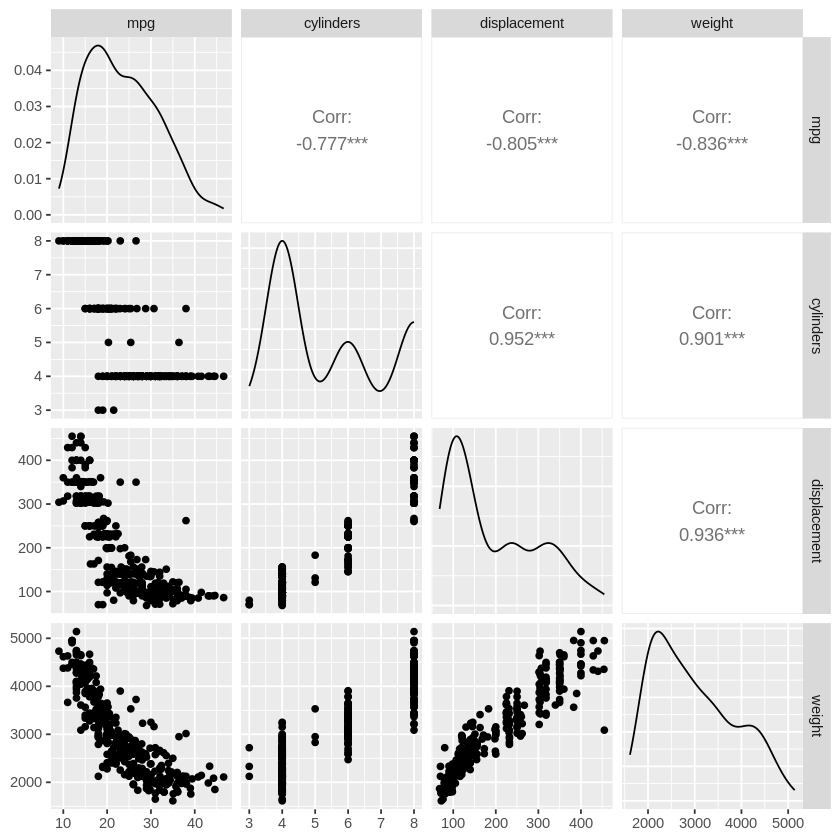

In [15]:
train_dataset %>%
  select(mpg, cylinders, displacement, weight) %>%
  GGally::ggpairs()

Let's also check the overall statistics.
Note how each feature covers a very different range:

In [16]:
skimr::skim(train_dataset)

── Data Summary ────────────────────────
                           Values       
Name                       train_dataset
Number of rows             312          
Number of columns          10           
_______________________                 
Column type frequency:                  
  numeric                  10           
________________________                
Group variables            None         

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable n_missing complete_rate     mean      sd   p0    p25    p50
 1 cylinders             0             1    5.47    1.71     3    4      4  
 2 displacement          0             1  195.    106.      68  100.   146  
 3 horsepower            0             1  105.     39.4     46   75     94.5
 4 weight                0             1 2986.    868.    1613 2233   2811  
 5 acceleration          0             1   15.5     2.69     8   13.8   15.5
 6 model_year            0             1   76.

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 12 > 1' in coercion to 'logical(1)'”


,skim_type,skim_variable,n_missing,complete_rate,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,numeric,cylinders,0,1,5.4743590,1.7122547,3,4.00,4.0,8.000,8.0,▇▁▃▁▅
2,numeric,displacement,0,1,194.7163462,105.5956637,68,100.25,146.0,302.000,455.0,▇▂▂▃▁
3,numeric,horsepower,0,1,105.0096154,39.3579080,46,75.00,94.5,129.250,230.0,▆▇▃▂▁
4,numeric,weight,0,1,2985.5320513,867.7911674,1613,2233.00,2811.0,3610.000,5140.0,▇▇▅▃▂
5,numeric,acceleration,0,1,15.5323718,2.6871632,8,13.80,15.5,17.000,23.7,▁▅▇▃▁
6,numeric,model_year,0,1,75.9903846,3.6577764,70,73.00,76.0,79.000,82.0,▇▆▇▅▇
7,numeric,mpg,0,1,23.4881410,7.9312817,9,17.00,22.4,29.125,46.6,▆▇▆▃▁
8,numeric,origin_USA,0,1,0.6282051,0.4840604,0,0.00,1.0,1.000,1.0,▅▁▁▁▇
9,numeric,origin_Europe,0,1,0.1762821,0.3816721,0,0.00,0.0,0.000,1.0,▇▁▁▁▂


Separate the target value---the "label"---from the features.
This label is the value that you will train the model to predict.

In [18]:
train_features <- train_dataset %>% select(-mpg)
test_features <- test_dataset %>% select(-mpg)
train_labels <- train_dataset %>% select(mpg)
test_labels <- test_dataset %>% select(mpg)

Remember: the `select()` function belongs to the `dplyr` package, which is part of the `tidyverse` ecosystem.

## Normalization

In the table of statistics it's easy to see how different the ranges of each feature are:

In [19]:
my_skim <- skimr::skim_with(numeric = skimr::sfl(mean, sd))
train_dataset %>%
  select(where(~is.numeric(.x))) %>%
  pivot_longer(
    cols = everything(), names_to = "variable", values_to = "values") %>%
  group_by(variable) %>%
  summarise(mean = mean(values), sd = sd(values))

variable,mean,sd
<chr>,<dbl>,<dbl>
acceleration,15.5323718,2.6871632
cylinders,5.4743590,1.7122547
displacement,194.7163462,105.5956637
horsepower,105.0096154,39.3579080
model_year,75.9903846,3.6577764
mpg,23.4881410,7.9312817
origin_Europe,0.1762821,0.3816721
origin_Japan,0.1955128,0.3972321
origin_USA,0.6282051,0.4840604


`my_skim <- skimr::skim_with(numeric = skimr::sfl(mean, sd))`: This line of code creates a custom `skim` object using the `skim_with()` function from the `skimr` package. The `skim_with()` function specifies that for numeric variables, the mean and standard deviation should be calculated. The resulting skim object is stored in the my_skim variable.

%>%: This is the pipe operator, which passes the output of the previous function as input to the next function.

`select(where(~is.numeric(.x)))`: This function uses the select() function from the dplyr package to select only the numeric columns from the train_dataset data frame. The `where()` function is used to specify a logical condition that selects only columns that are numeric. The resulting data frame contains only the numeric columns.

`pivot_longer(cols = everything(), names_to = "variable", values_to = "values")`: This function uses the `pivot_longer()` function from the `tidyr` package to reshape the data frame from wide to long format. The `cols = everything()` argument specifies that all columns in the data frame should be included. The `names_to = "variable"` argument specifies that the column names should be used as the variable names in the resulting long format data frame. The `values_to = "values"` argument specifies that the cell values should be used as the values in the resulting long format data frame.

`group_by(variable)`: This function uses the `group_by()` function from the dplyr package to group the data by the variable column.

`summarise(mean = mean(values), sd = sd(values))`: This function uses the `summarise()` function from the dplyr package to calculate summary statistics for each group defined by the `group_by()` function. Specifically, it calculates the mean and standard deviation of the values column for each group. The resulting data frame contains one row for each group, with columns for the group variable, mean, and standard deviation.

It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights.
So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model *might* converge without feature normalization, normalization makes training much more stable.

Note: There is no advantage to normalizing the one-hot features---it is done here for simplicity.

### The Normalization layer

The `layer_normalization()` is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [20]:
normalizer <- layer_normalization(axis = -1L)

The `layer_normalization()` function is a function from the `keras` package in R that creates a layer of type "LayerNormalization" for use in a neural network. The layer normalization is a technique that can be used to improve the performance of a neural network by normalizing the output of each layer, thus preventing the output from becoming too large or too small. `normalizer <- layer_normalization(axis = -1L)`: This line of code creates a new layer of type "LayerNormalization" using the layer_normalization() function from the keras package. The axis argument specifies which axis of the input tensor should be normalized. In this case, -1L indicates that the last axis of the tensor should be normalized.

Then, fit the state of the preprocessing layer to the data by calling `adapt()`:

In [21]:
normalizer %>% adapt(as.matrix(train_features))

`adapt(as.matrix(train_features))`: This function uses the `adapt()` method to adapt the normalization layer to the training data. The `as.matrix()` function is used to convert the train_features data to a matrix, which is required as input to the `adapt()` method. The `adapt()` method modifies the parameters of the normalization layer based on the statistics of the input data, such as the mean and standard deviation.

Calculate the mean and variance, and store them in the layer:

In [22]:
print(normalizer$mean)

tf.Tensor(
[[5.47435904e+00 1.94716339e+02 1.05009621e+02 2.98553223e+03
  1.55323715e+01 7.59903793e+01 6.28205121e-01 1.76282078e-01
  1.95512846e-01]], shape=(1, 9), dtype=float32)


When the layer is called, it returns the input data, with each feature independently normalized.

In [23]:
first <- as.matrix(train_features[1,])
cat('First example:', first)
cat('Normalized:', as.matrix(normalizer(first)))

First example: 8 429 198 4341 10 70 1 0 0Normalized: 1.477408 2.22225 2.366482 1.564484 -2.062122 -1.640342 0.7693092 -0.4626098 -0.4929787

# Linear regression with a 'naive' neural network



Before building a deep neural network model, start with linear regression using one and several variables.

### Linear regression with one variable

Begin with a single-variable linear regression to predict `'mpg'` from `'horsepower'`.

Training a model with Keras typically starts by defining the model architecture.
Use a Sequential model, which [represents a sequence of steps](https://www.tensorflow.org/guide/keras/sequential_model).

There are two steps in your single-variable linear regression model:

-   Normalize the `'horsepower'` input features using the `normalization` preprocessing layer.
-   Apply a linear transformation ($y = mx+b$) to produce 1 output using a linear layer (`dense`).

The number of *inputs* can either be set by the `input_shape` argument, or automatically when the model is run for the first time.

First, create a matrix made of the `'horsepower'` features.
Then, instantiate the `layer_normalization` and fit its state to the `horsepower` data:

In [24]:
horsepower <- matrix(train_features$horsepower)
horsepower_normalizer <- layer_normalization(input_shape = shape(1), axis = NULL)
horsepower_normalizer %>% adapt(horsepower)

shape(1) is a function that creates a shape object, which is a way of representing the shape of a tensor or array. The argument 1 specifies the number of dimensions in the shape object, which in this case is a single dimension.

Therefore, input_shape = shape(1) specifies that the layer_normalization() layer expects input data with a shape of (None, 1), where None represents an arbitrary number of rows (i.e., the batch size) and 1 represents a single feature.

Build the Keras Sequential model:

In [25]:
horsepower_model <- keras_model_sequential() %>%
  horsepower_normalizer() %>%
  layer_dense(units = 1)
summary(horsepower_model)

Model: "sequential"
________________________________________________________________________________
 Layer (type)                  Output Shape               Param #    Trainable  
 normalization_1 (Normalizatio  (None, 1)                 3          Y          
 n)                                                                             
 dense (Dense)                 (None, 1)                  2          Y          
Total params: 5
Trainable params: 2
Non-trainable params: 3
________________________________________________________________________________


In the code you provided, a Keras sequential model is created to predict the mpg values of a car based on its horsepower feature. Here's what each component of the code does:

`keras_model_sequential()`: This function from the keras package creates a new sequential model. A sequential model is a linear stack of layers, where the output of one layer is the input to the next layer.

`%>%`: This is the pipe operator, which passes the output of the previous function as input to the next function.

`horsepower_normalizer()`: This function adds the horsepower_normalizer layer that was previously created to the sequential model. The normalization layer will be used to normalize the horsepower input data.

`%>%`: This is the pipe operator, which passes the output of the previous function as input to the next function.

`layer_dense(units = 1)`: This function adds a dense layer to the sequential model. A dense layer is a type of layer that performs a linear transformation of the input data, followed by an activation function. The units argument specifies the number of output units in the layer, which in this case is 1.

`summary(horsepower_model)`: This function displays a summary of the architecture of the horsepower_model. The summary shows the number of parameters in each layer and the total number of parameters in the model.

This model will predict `'mpg'` from `'horsepower'`.

Run the untrained model on the first 10 'horsepower' values.
The output won't be good, but notice that it has the expected shape of `(10, 1)`:

In [26]:
predict(horsepower_model, horsepower[1:10,])

2.6494279
-1.2823880
2.4214966
-0.6270853
-0.1427312
-0.4846283
2.1365824
1.2818397
-0.7695424
3.1337819


Once the model is built, configure the training procedure using the Keras `compile()` method.
The most important arguments to compile are the `loss` and the `optimizer`, since these define what will be optimized (`mean_absolute_error`) and how (using the `optimizer_adam`).


In [27]:
horsepower_model %>% compile(
  optimizer = optimizer_adam(learning_rate = 0.1),
  loss = 'mean_absolute_error'
)

The `compile()` function is used to specify the optimization algorithm and loss function that will be used during training of the horsepower_model. This function is an important step in training a deep learning model, as it specifies the parameters that will be used to update the model weights during each iteration of the optimization algorithm.

`horsepower_model`: This is the Keras sequential model that was previously created.

`%>%`: This is the pipe operator, which passes the output of the previous function as input to the next function.

`compile()`: This function is used to compile the Keras model with a specified optimizer and loss function. Compiling a model involves specifying the optimization algorithm and loss function that will be used during training.

`optimizer = optimizer_adam(learning_rate = 0.1)`: This argument specifies the optimization algorithm that will be used during training. In this case, the `optimizer_adam()` function is used to create an Adam optimizer, which is a type of stochastic gradient descent (SGD) optimization algorithm that is often used for deep learning. The learning_rate argument specifies the learning rate, which determines the step size that is taken during gradient descent.

`loss = 'mean_absolute_error'`: This argument specifies the loss function that will be used during training. In this case, the 'mean_absolute_error' loss function is used, which calculates the mean absolute difference between the predicted and actual values.




Use Keras `fit()` to execute the training for 100 epochs:


In [28]:
history <- horsepower_model %>% fit(
  as.matrix(train_features$horsepower),
  as.matrix(train_labels),
  epochs = 100,
  # Suppress logging.
  verbose = 0,
  # Calculate validation results on 20% of the training data.
  validation_split = 0.2
)

Visualize the model's training progress using the stats stored in the `history` object:


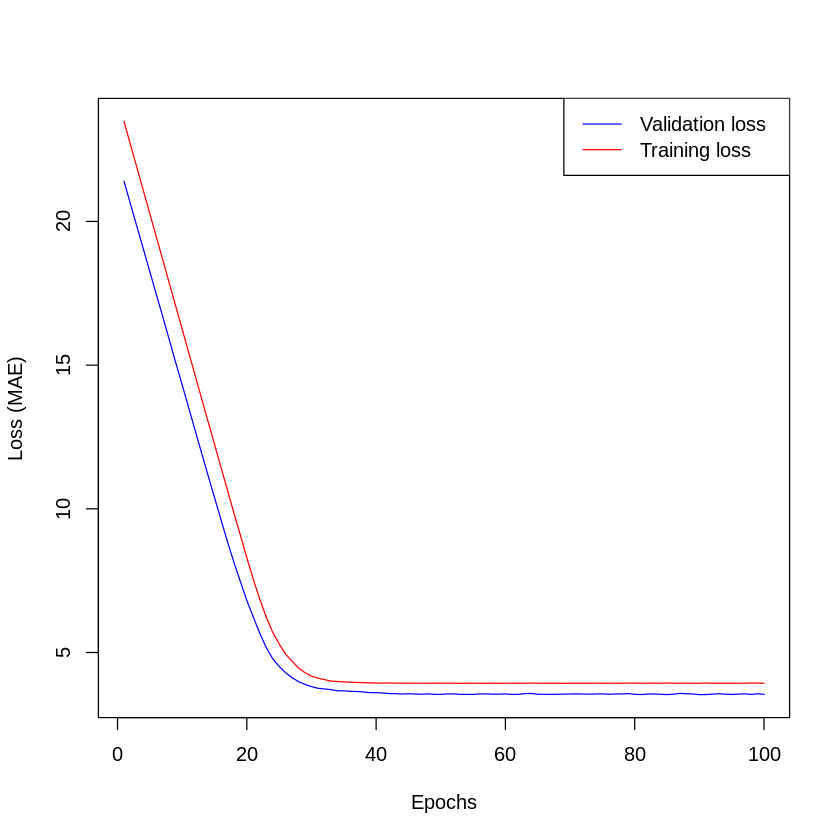

In [44]:
matplot(x = 1:history$params$epochs,
        y = cbind(history$metrics$val_loss, history$metrics$loss),
        type = "l",
        xlab = "Epochs",
        ylab = "Loss (MAE)",
        col = c("blue", "red"),
        lty = 1)
legend("topright",
       legend = c("Validation loss", "Training loss"),
       col = c("blue", "red"),
       lty = 1)

The `matplot()` function in R is used to create a plot with multiple lines or curves on the same plot. It allows you to specify multiple sets of y-axis values for a common set of x-axis values, and plot them on the same graph.

Collect the results on the test set for later:

In [45]:
test_results <- list()
test_results[["horsepower_model"]] <- horsepower_model %>% evaluate(
  as.matrix(test_features$horsepower),
  as.matrix(test_labels),
  verbose = 0
)

Since this is a single variable regression, it's easy to view the model's predictions as a function of the input:


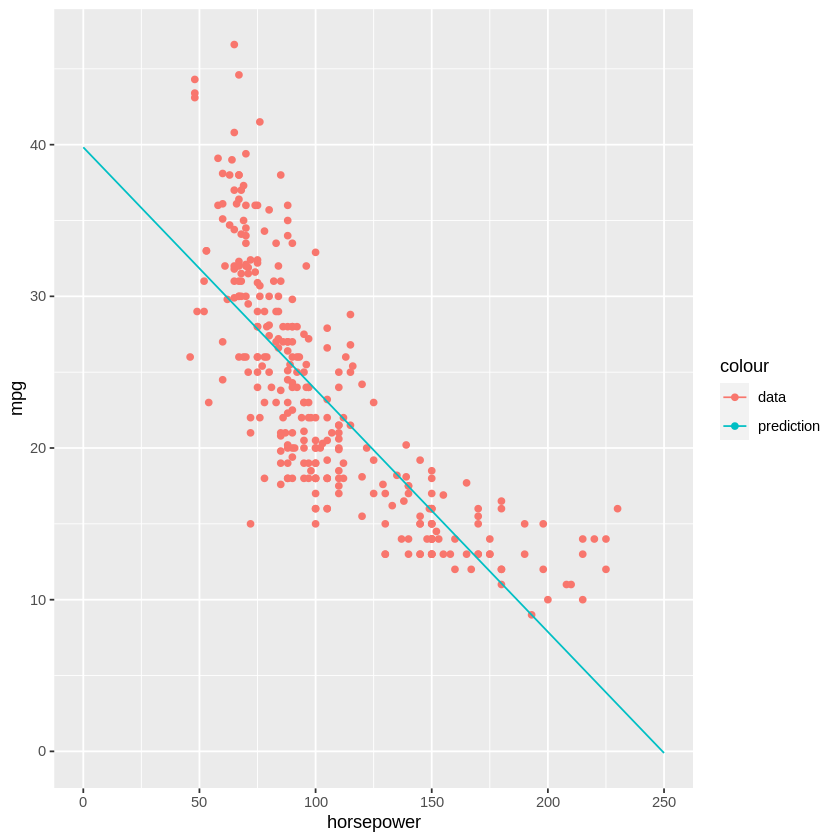

In [46]:
x <- seq(0, 250, length.out = 251)
y <- predict(horsepower_model, x)

ggplot(train_dataset) +
  geom_point(aes(x = horsepower, y = mpg, color = "data")) +
  geom_line(data = data.frame(x, y), aes(x = x, y = y, color = "prediction"))

The `ggplot()` function is used to create a scatter plot of the train_dataset, with horsepower on the x-axis and mpg on the y-axis. The `geom_point()` function is used to add the points to the plot, with each point representing a single observation in the train_dataset. The color aesthetic is set to "data", which assigns a fixed color to all the data points.

In addition to the scatter plot, the code also adds a line representing a predicted relationship between horsepower and mpg. This line is added using the `geom_line()` function, which takes a separate data frame (`data.frame(x, y)`) as input. The `x` and `y` variables in this data frame correspond to the values of horsepower and the corresponding predicted mpg values, respectively.

The `aes()` function is used to specify the aesthetics of the line, with x and y corresponding to the x and y variables in the `data.frame(x, y)` data frame, respectively. The color aesthetic is set to "prediction", which assigns a fixed color to the line. By using a different color aesthetic for the points and the line, the code effectively distinguishes between the observed data and the predicted values.

### Linear regression with multiple inputs

You can use an almost identical setup to make predictions based on multiple inputs.
This model still does the same $y = mx+b$ except that $m$ is a matrix and $b$ is a vector.

Create a two-step Keras Sequential model again with the first layer being `normalizer` (`layer_normalization(axis = -1)`) you defined earlier and adapted to the whole dataset:


In [48]:
linear_model <- keras_model_sequential() %>%
  normalizer() %>%
  layer_dense(units = 1)

When you call `predict()` on a batch of inputs, it produces `units = 1` outputs for each example:


In [49]:
predict(linear_model, as.matrix(train_features[1:10, ]))

1.4894693
0.1043001
0.9962621
0.6206177
-0.8285871
0.8027277
0.8795043
0.3046834
0.5852233
1.1495172


When you call the model, its weight matrices will be built---check that the `kernel` weights (the $m$ in $y = mx+b$) have a shape of `(9, 1)`:


In [50]:
linear_model$layers[[2]]$kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.50006366],
       [ 0.43787742],
       [ 0.6885756 ],
       [-0.20013618],
       [-0.19314593],
       [-0.06186223],
       [-0.53033864],
       [ 0.0877589 ],
       [ 0.22794282]], dtype=float32)>

Configure the model with Keras `compile()` and train with `fit()` for 100 epochs:


In [51]:
linear_model %>% compile(
  optimizer = optimizer_adam(learning_rate = 0.1),
  loss = 'mean_absolute_error'
)

history <- linear_model %>% fit(
  as.matrix(train_features),
  as.matrix(train_labels),
  epochs = 100,
  # Suppress logging.
  verbose = 0,
  # Calculate validation results on 20% of the training data.
  validation_split = 0.2
)

Using all the inputs in this regression model achieves a much lower training and validation error than the `horsepower_model`, which had one input:


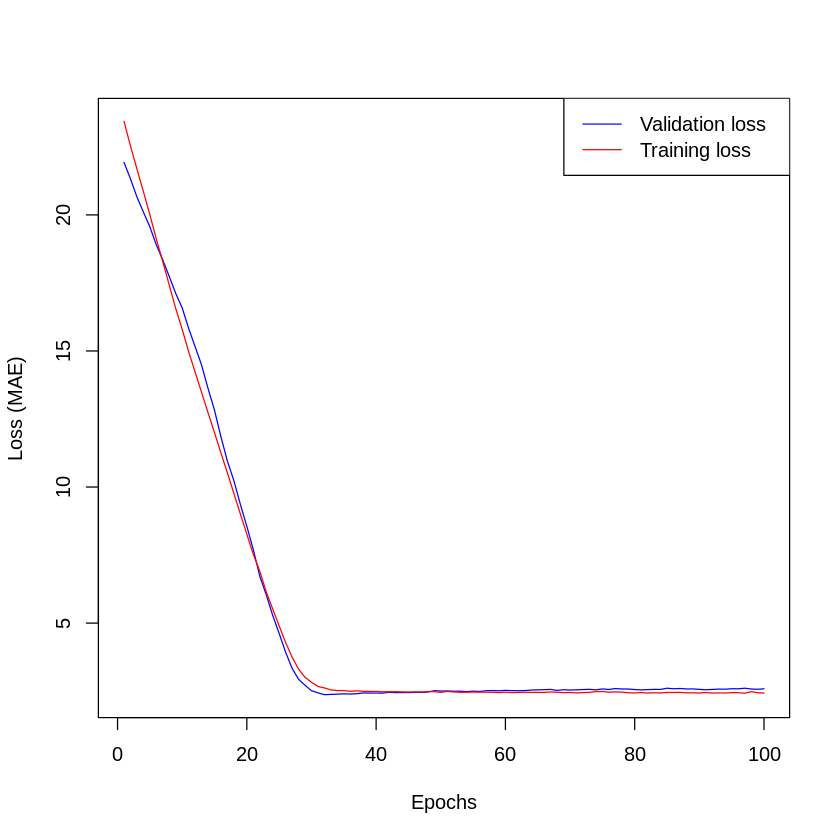

In [52]:
matplot(x = 1:history$params$epochs,
        y = cbind(history$metrics$val_loss, history$metrics$loss),
        type = "l",
        xlab = "Epochs",
        ylab = "Loss (MAE)",
        col = c("blue", "red"),
        lty = 1)
legend("topright",
       legend = c("Validation loss", "Training loss"),
       col = c("blue", "red"),
       lty = 1)

Collect the results on the test set for later:

In [53]:
test_results[['linear_model']] <- linear_model %>%
  evaluate(
    as.matrix(test_features),
    as.matrix(test_labels),
    verbose = 0
  )

# Regression with a deep neural network (DNN)



In the previous section, you implemented two linear models for single and multiple inputs.

Here, you will implement single-input and multiple-input DNN models.

The code is basically the same except the model is expanded to include some "hidden" non-linear layers.
The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

-   The normalization layer, as before (with `horsepower_normalizer` for a single-input model and `normalizer` for a multiple-input model).
-   Two hidden, non-linear, `Dense` layers with the ReLU (`relu`) activation function nonlinearity.
-   A linear `Dense` single-output layer.

Both models will use the same training procedure so the `compile` method is included in the `build_and_compile_model` function below.


In [54]:
build_and_compile_model <- function(norm) {
  model <- keras_model_sequential() %>%
    norm() %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(64, activation = 'relu') %>%
    layer_dense(1)
  model %>% compile(
    loss = 'mean_absolute_error',
    optimizer = optimizer_adam(0.001)
  )
  model
}

The Rectified Linear Unit (ReLU) is a widely used activation function in neural networks. The ReLU function is defined as: 

```
f(x) = max(0, x)
```
In other words, the output of the ReLU function is the maximum of zero and the input value x. This means that the ReLU function maps all negative inputs to zero, while leaving all non-negative inputs unchanged.

The ReLU activation function has several desirable properties that make it a popular choice in neural networks:

- Simplicity: The ReLU function is simple to compute and has no parameters to tune.

- Sparsity: By setting negative values to zero, the ReLU function can create sparsity in the network, which can help to prevent overfitting.

- Non-linearity: The ReLU function is a non-linear function, which means that it can help the network learn complex, non-linear relationships between inputs and outputs.

- Efficiency: Because the ReLU function is so simple, it is computationally efficient to apply in large-scale neural networks.

### Regression using a DNN and a single input

Create a DNN model with only `'Horsepower'` as input and `horsepower_normalizer` (defined earlier) as the normalization layer:


In [55]:
dnn_horsepower_model <- build_and_compile_model(horsepower_normalizer)

This model has quite a few more trainable parameters than the linear models:

In [56]:
summary(dnn_horsepower_model)

Model: "sequential_2"
________________________________________________________________________________
 Layer (type)                  Output Shape               Param #    Trainable  
 normalization_1 (Normalizatio  (None, 1)                 3          Y          
 n)                                                                             
 dense_4 (Dense)               (None, 64)                 128        Y          
 dense_3 (Dense)               (None, 64)                 4160       Y          
 dense_2 (Dense)               (None, 1)                  65         Y          
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
________________________________________________________________________________


Train the model with Keras `Model$fit`:

In [57]:
history <- dnn_horsepower_model %>% fit(
  as.matrix(train_features$horsepower),
  as.matrix(train_labels),
  validation_split = 0.2,
  verbose = 0,
  epochs = 100
)

This model does slightly better than the linear single-input `horsepower_model`:

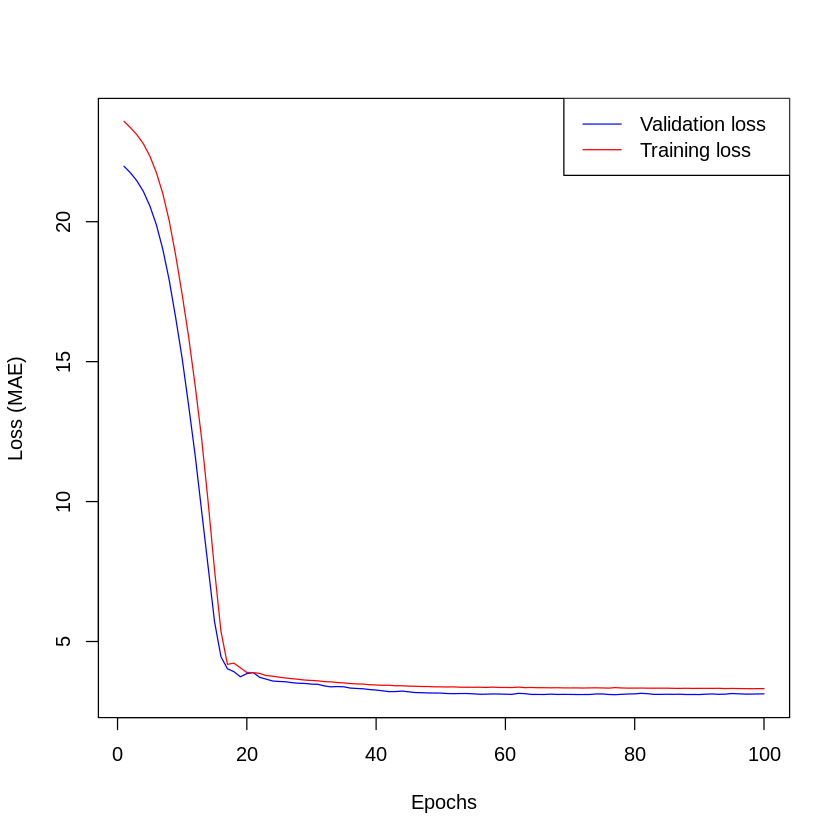

In [59]:
matplot(x = 1:history$params$epochs,
        y = cbind(history$metrics$val_loss, history$metrics$loss),
        type = "l",
        xlab = "Epochs",
        ylab = "Loss (MAE)",
        col = c("blue", "red"),
        lty = 1)
legend("topright",
       legend = c("Validation loss", "Training loss"),
       col = c("blue", "red"),
       lty = 1)

If you plot the predictions as a function of `'horsepower'`, you should notice how this model takes advantage of the nonlinearity provided by the hidden layers:


In [60]:
x <- seq(0.0, 250, length.out = 251)
y <- predict(dnn_horsepower_model, x)

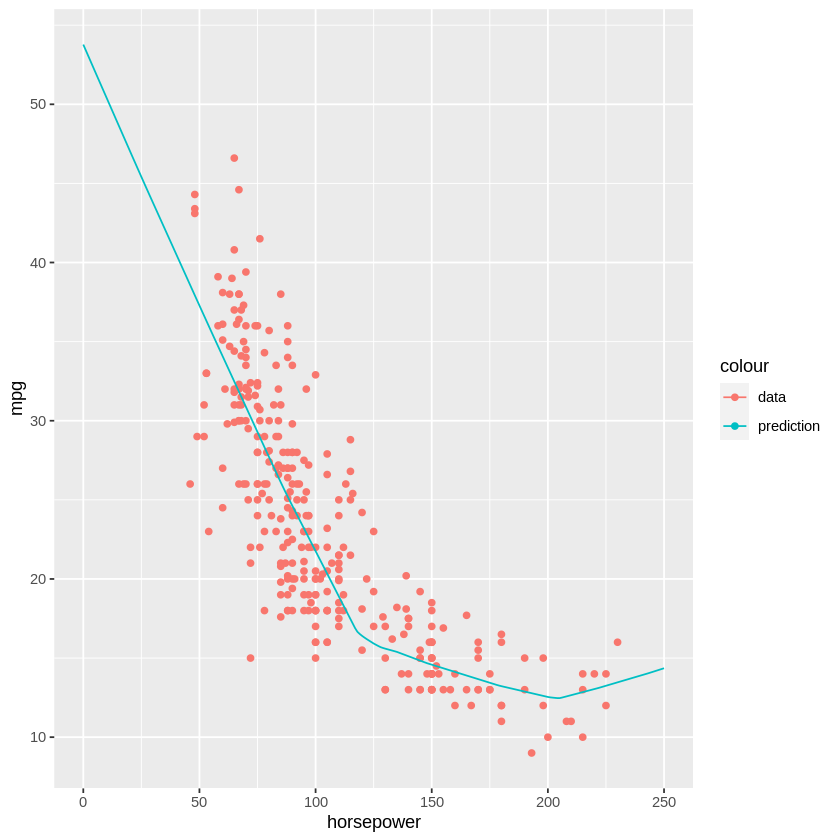

In [61]:
ggplot(train_dataset) +
  geom_point(aes(x = horsepower, y = mpg, color = "data")) +
  geom_line(data = data.frame(x, y), aes(x = x, y = y, color = "prediction"))

Collect the results on the test set for later:

In [62]:
test_results[['dnn_horsepower_model']] <- dnn_horsepower_model %>% evaluate(
  as.matrix(test_features$horsepower),
  as.matrix(test_labels),
  verbose = 0
)

### Regression using a DNN and multiple inputs

Repeat the previous process using all the inputs.
The model's performance slightly improves on the validation dataset.

In [63]:
dnn_model <- build_and_compile_model(normalizer)
summary(dnn_model)

Model: "sequential_3"
________________________________________________________________________________
 Layer (type)                  Output Shape               Param #    Trainable  
 normalization (Normalization)  (None, 9)                 19         Y          
 dense_7 (Dense)               (None, 64)                 640        Y          
 dense_6 (Dense)               (None, 64)                 4160       Y          
 dense_5 (Dense)               (None, 1)                  65         Y          
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
________________________________________________________________________________


In [64]:
history <- dnn_model %>% fit(
  as.matrix(train_features),
  as.matrix(train_labels),
  validation_split = 0.2,
  verbose = 0,
  epochs = 100
)

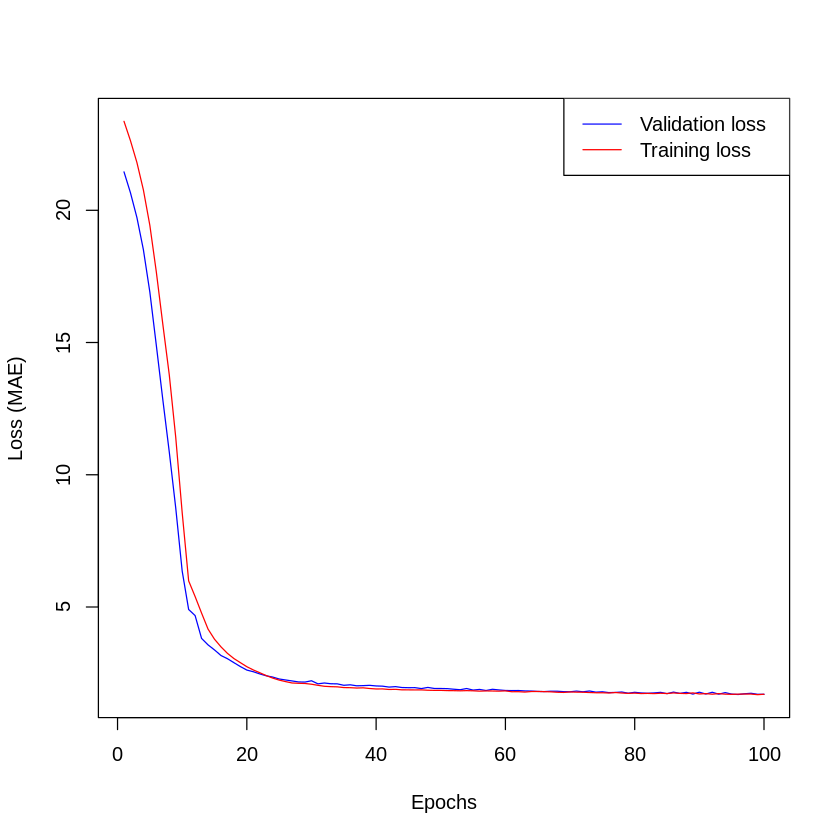

In [66]:
matplot(x = 1:history$params$epochs,
        y = cbind(history$metrics$val_loss, history$metrics$loss),
        type = "l",
        xlab = "Epochs",
        ylab = "Loss (MAE)",
        col = c("blue", "red"),
        lty = 1)
legend("topright",
       legend = c("Validation loss", "Training loss"),
       col = c("blue", "red"),
       lty = 1)

Collect the results on the test set:

In [67]:
test_results[['dnn_model']] <- dnn_model %>% evaluate(
  as.matrix(test_features),
  as.matrix(test_labels),
  verbose = 0
)

# Performance

Since all models have been trained, you can review their test set performance:

In [69]:
test_results

$horsepower_model
    loss 
3.680175 

$linear_model
    loss 
2.476507 

$dnn_horsepower_model
    loss 
3.193804 

$dnn_model
   loss 
1.85066

These results match the validation error observed during training.

### Make predictions

You can now make predictions with the `dnn_model` on the test set using Keras `predict()` and review the loss:

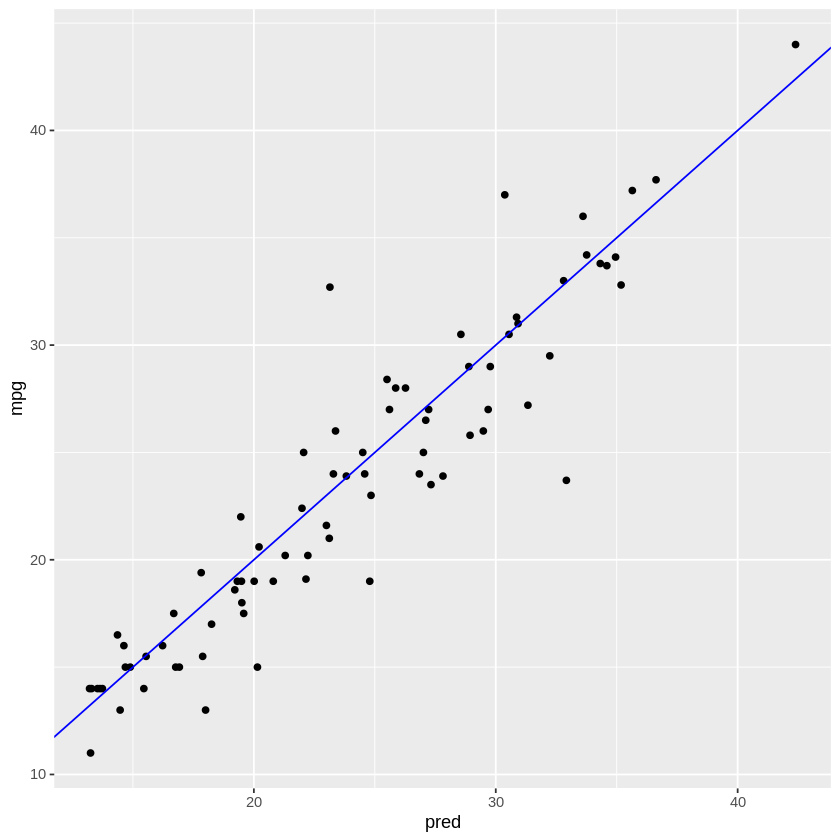

In [70]:
test_predictions <- predict(dnn_model, as.matrix(test_features))
ggplot(data.frame(pred = as.numeric(test_predictions), mpg = test_labels$mpg)) +
  geom_point(aes(x = pred, y = mpg)) +
  geom_abline(intercept = 0, slope = 1, color = "blue")

It appears that the model predicts reasonably well.

Now, check the error distribution:

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”


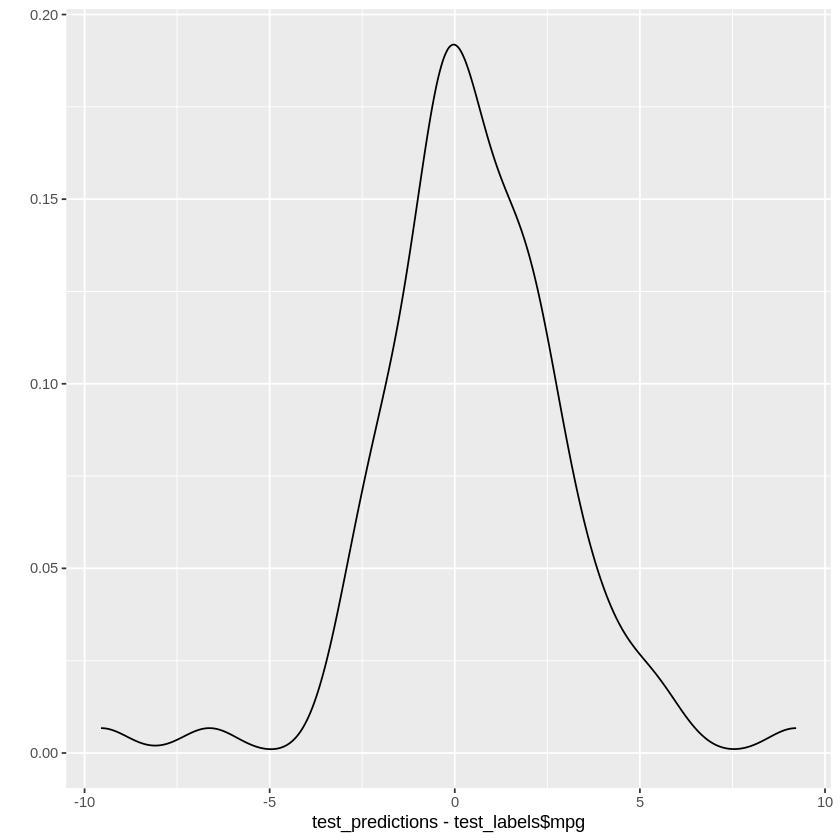

In [71]:
qplot(test_predictions - test_labels$mpg, geom = "density")
error <- test_predictions - test_labels

If you're happy with the model, save it for later use with `Model$save`:


In [72]:
save_model_tf(dnn_model, 'dnn_model')

If you reload the model, it gives identical output:

In [73]:
reloaded <- load_model_tf('dnn_model')
test_results[['reloaded']] <- reloaded %>% evaluate(
  as.matrix(test_features),
  as.matrix(test_labels),
  verbose = 0
)

In [74]:
test_results

$horsepower_model
    loss 
3.680175 

$linear_model
    loss 
2.476507 

$dnn_horsepower_model
    loss 
3.193804 

$dnn_model
   loss 
1.85066 

$reloaded
   loss 
1.85066

## Conclusion

This notebook introduced a few techniques to handle a regression problem.
Here are a few more tips that may help:

-   Mean squared error (MSE) (`loss_mean_squared_error()`) and mean absolute error (MAE) (`loss_mean_absolute_error()`) are common loss functions used for regression problems. MAE is less sensitive to outliers. Different loss functions are used for classification problems.
-   Similarly, evaluation metrics used for regression differ from classification.
-   When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
-   Overfitting is a common problem for DNN models, though it wasn't a problem for this tutorial. 

Some best practices when training neural networks:

- Normalize the input data: It is generally a good idea to normalize the input data to have zero mean and unit variance, as this can help to improve the convergence of the optimization algorithm.

- Use appropriate activation functions: Different activation functions have different properties, and the choice of activation function can have a big impact on the performance of the network. Some commonly used activation functions include ReLU, sigmoid, and tanh.

- Choose appropriate network architecture: The choice of network architecture (i.e., number of layers, number of neurons per layer) can also have a big impact on the performance of the network. It is important to choose a network architecture that is appropriate for the problem at hand.

- Use regularization: Regularization techniques such as L1/L2 regularization, dropout, and early stopping can help to prevent overfitting and improve generalization performance.

- Use appropriate optimization algorithm: The choice of optimization algorithm can also have a big impact on the performance of the network. Some commonly used optimization algorithms include stochastic gradient descent (SGD), Adam, and Adagrad.

- Monitor training progress: It is important to monitor the progress of the training process, and to use appropriate metrics to evaluate the performance of the network on both the training and validation data.

- Use appropriate data augmentation techniques: Data augmentation techniques such as flipping, rotating, and scaling the input data can help to increase the amount of training data and improve the generalization performance of the network.

- Start with a simple model: It is generally a good idea to start with a simple model and gradually increase the complexity as needed. This can help to avoid overfitting and make it easier to debug and understand the behavior of the network.



When using cross-validation to tune the hyperparameters of a neural network, some common parameters to tune include:

- Learning rate: The learning rate determines the step size used during the optimization process, and can have a big impact on the convergence and performance of the network.

- Number of epochs: The number of epochs determines how many times the network will see the entire training dataset during training. Tuning this parameter can help to prevent overfitting and improve generalization performance.

- Batch size: The batch size determines how many samples are used in each forward/backward pass of the optimization algorithm. Tuning this parameter can affect the speed and stability of the training process.

- Number of layers: The number of layers in the network can have a big impact on the complexity and performance of the network. Tuning this parameter can help to find an appropriate balance between complexity and generalization performance.

- Number of neurons per layer: The number of neurons in each layer can also have a big impact on the performance of the network. Tuning this parameter can help to find an appropriate balance between complexity and generalization performance.

- Dropout rate: Dropout is a regularization technique that can help to prevent overfitting by randomly dropping out neurons during training. Tuning the dropout rate can affect the regularization strength and generalization performance of the network.

- Activation functions: Different activation functions can have different properties and can affect the performance of the network. Tuning the choice of activation functions can help to find an appropriate balance between complexity and generalization performance.